In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import networkx as nx

# Communities & cliques

## Cliques
* Social cliques: tightly-knit groups
* Network cliques: completely connected graphs

## Simplest complex clique: a triangle

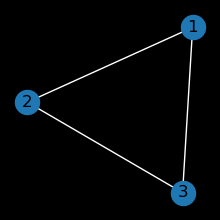

In [2]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(2,3),(1,3)])
fig = plt.figure(figsize=(2,2))
nx.draw(G, with_labels=True, edge_color='white')
fig.set_facecolor('black')

## Clique Code

In [3]:
from itertools import combinations
for n1, n2 in combinations(G.nodes(), 2):
    print(n1, n2)

1 2
1 3
2 3


## Identifying triangle relationships

Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

In [4]:
nodes = (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49)
edges = [(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (16, 18), (16, 35), (16, 36), (16, 48), (18, 16), (18, 24), (18, 35), (18, 36), (19, 5), (19, 8), (19, 11), (19, 13), (19, 15), (19, 17), (19, 20), (19, 21), (19, 24), (19, 30), (19, 31), (19, 35), (19, 36), (19, 37), (19, 48), (28, 1), (28, 5), (28, 7), (28, 8), (28, 11), (28, 14), (28, 15), (28, 17), (28, 20), (28, 21), (28, 24), (28, 25), (28, 27), (28, 29), (28, 30), (28, 31), (28, 35), (28, 36), (28, 37), (28, 44), (28, 48), (28, 49), (36, 5), (36, 24), (36, 35), (36, 37), (37, 24), (37, 35), (37, 36), (39, 1), (39, 24), (39, 33), (39, 35), (39, 36), (39, 38), (39, 40), (39, 41), (39, 45), (42, 1), (43, 24), (43, 29), (43, 35), (43, 36), (43, 37), (43, 47), (43, 48), (45, 1), (45, 39), (45, 41)]
T = nx.Graph()
T.add_nodes_from(nodes)
T.add_edges_from(edges)
len(T.nodes()), len(T.edges())

(48, 112)

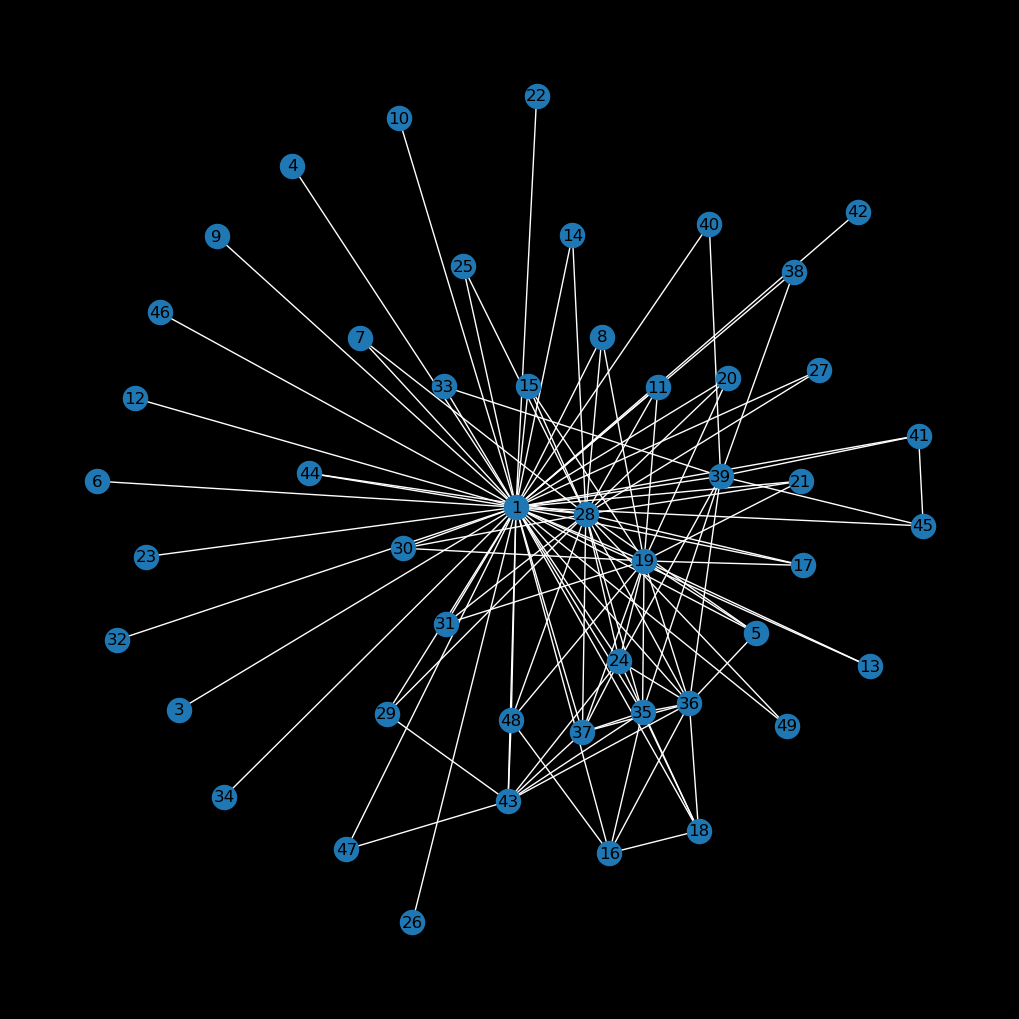

In [5]:
fig=plt.figure(figsize=(10, 10))
nx.draw(T, with_labels=True, edge_color='white')
fig.set_facecolor('black')

In [6]:
# node 1 neighbors
neighbors = list(T.neighbors(1))
print(f'{len(neighbors)=}')
print(f'{neighbors=}')

len(neighbors)=47
neighbors=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [7]:
# neighbors combinations
neighbor_combinations = list(combinations(T.neighbors(1), 2))
print(f'{len(neighbor_combinations)=}')
print(f'{neighbor_combinations=}')

len(neighbor_combinations)=1081
neighbor_combinations=[(3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (3, 29), (3, 30), (3, 31), (3, 32), (3, 33), (3, 34), (3, 35), (3, 36), (3, 37), (3, 38), (3, 39), (3, 40), (3, 41), (3, 42), (3, 43), (3, 44), (3, 45), (3, 46), (3, 47), (3, 48), (3, 49), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 28), (4, 29), (4, 30), (4, 31), (4, 32), (4, 33), (4, 34), (4, 35), (4, 36), (4, 37), (4, 38), (4, 39), (4, 40), (4, 41), (4, 42), (4, 43), (4, 44), (4, 45), (4, 46), (4, 47), (4, 48), (4, 49), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (5, 21

In [8]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.
    Returns a boolean.
    """
    in_triangle = False
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            # early stop
            break
    return in_triangle

In [9]:
is_in_triangle(T, 1)

True

## Finding nodes involved in triangles

NetworkX provides an API for counting the number of triangles that every node is involved in: `nx.triangles(G)`.

> Finds the number of triangles that include a node as one vertex

In [10]:
triangle_counts = nx.triangles(T)
print(f'{len(triangle_counts)=}')
print(f'{triangle_counts=}')

len(triangle_counts)=48
triangle_counts={1: 65, 3: 0, 4: 0, 5: 5, 6: 0, 7: 1, 8: 2, 9: 0, 10: 0, 11: 2, 12: 0, 13: 1, 14: 1, 15: 2, 16: 7, 17: 2, 18: 8, 19: 21, 20: 2, 21: 2, 22: 0, 23: 0, 24: 16, 25: 1, 26: 0, 27: 1, 28: 27, 29: 2, 30: 2, 31: 2, 32: 0, 33: 1, 34: 0, 35: 19, 36: 29, 37: 17, 38: 1, 39: 11, 40: 1, 41: 3, 42: 0, 43: 12, 44: 1, 45: 3, 46: 0, 47: 1, 48: 4, 49: 1}


Extract all of the nodes involved in a triangle relationship with a given node.

In [11]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

In [12]:
print(f'{nodes_in_triangle(T, 1)=}')

nodes_in_triangle(T, 1)={1, 5, 7, 8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49}


In [13]:
print(f'{nodes_in_triangle(T, 8)=}')

nodes_in_triangle(T, 8)={8, 1, 19, 28}


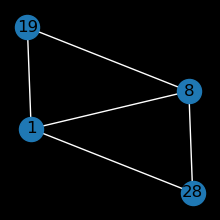

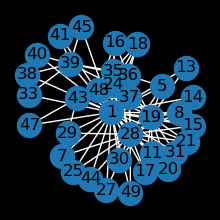

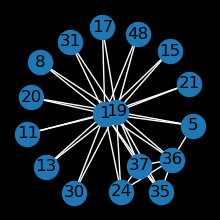

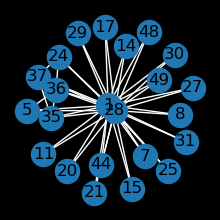

In [14]:
# subgraphs connected to triangles formed by a node
for node in nodes_in_triangle(T, 8):
    fig=plt.figure(figsize=(2,2))
    nx.draw(T.subgraph(nodes_in_triangle(T, node)) , with_labels=True, edge_color='white')
    fig.set_facecolor('black')

## Finding open triangles

In [15]:
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

In [16]:
# print nodes in open triangles
print([n for n in T if node_in_open_triangle(T,n)])

[1, 5, 8, 11, 15, 16, 17, 18, 19, 20, 21, 24, 28, 29, 30, 31, 35, 36, 37, 39, 43, 48]


In [17]:
# Compute the number of open triangles in T
sum(node_in_open_triangle(T,n) for n in T)

22

# Maximal cliques
* Definition: a clique that, when extended by one node is no longer a clique
* Applications: community finding

## Communities
* Find cliques
* Find unions of cliques

## NetworkX API
* `find_cliques` finds all maximal cliques

## Maximal cliques

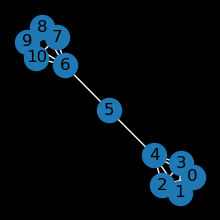

In [18]:
G = nx.barbell_graph(m1=5, m2=1)
fig=plt.figure(figsize=(2,2))
nx.draw(G, with_labels=True, edge_color='white')
fig.set_facecolor('black')

In [19]:
nx.find_cliques(G)

<generator object find_cliques at 0x7fbc5cf0a190>

In [20]:
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

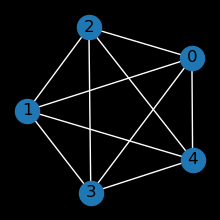

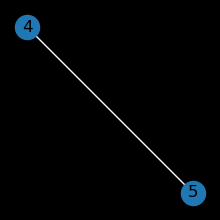

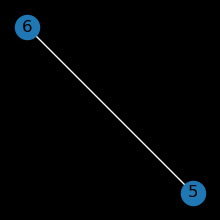

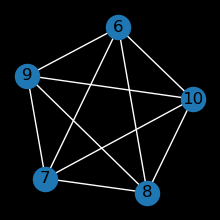

In [21]:
for community in nx.find_cliques(G):
    fig=plt.figure(figsize=(2,2))
    nx.draw(G.subgraph(community), with_labels=True, edge_color='white')
    fig.set_facecolor('black')

## Finding all maximal cliques of size "n"

In [22]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33

In [23]:
import numpy as np
# identify clique sizes in the network
clique_sizes = np.unique([len(clique)
                          for n in range(1, len(T)+1)
                          for clique in maximal_cliques(T, n)])
clique_sizes

array([2, 3, 4, 5])

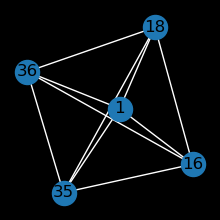

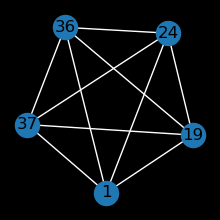

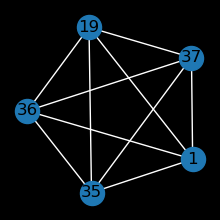

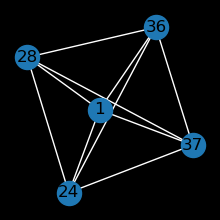

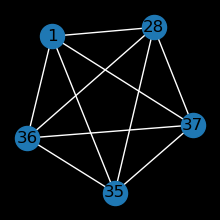

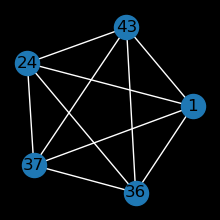

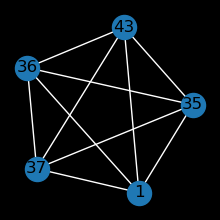

In [24]:
# plotting cliques of a specific size
for clique in maximal_cliques(T, 5):
    fig=plt.figure(figsize=(2,2))
    nx.draw(T.subgraph(clique), with_labels=True, edge_color='white')
    fig.set_facecolor('black')

## Subgraphs
* Visualize portions of a large graph
    * Paths
    * Communities/cliques
    * Degrees of separation from a node

* `erdos_renyi_graph` returns a random graph, also known as an Erdős-Rényi graph or a binomial graph.
* The model chooses each of the possible edges with probability $p$.

In [25]:
G = nx.erdos_renyi_graph(n=20, p=0.2)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

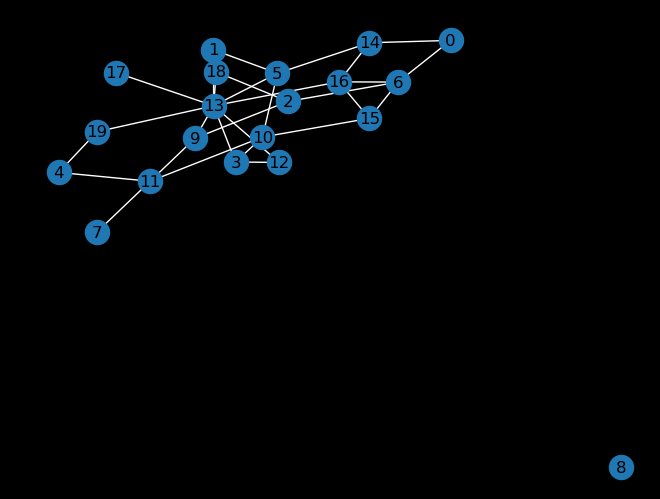

In [26]:
fig=plt.figure()
nx.draw(G, with_labels=True, edge_color='white')
fig.set_facecolor('black')

## Plotting a subgraph of a node and its neighbors

In [27]:
nodes = list(G.neighbors(8))
nodes

[]

In [28]:
nodes.append(8)

In [29]:
G_eight = G.subgraph(nodes)
G_eight.edges()

EdgeView([])

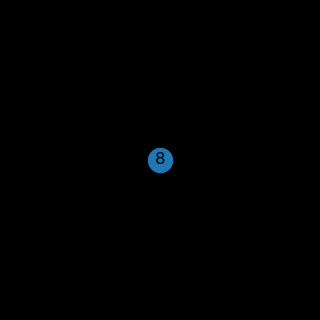

In [30]:
fig=plt.figure(figsize=(3,3))
nx.draw(G_eight, with_labels=True, edge_color='white')
fig.set_facecolor('black')

## Get nodes and neighbors

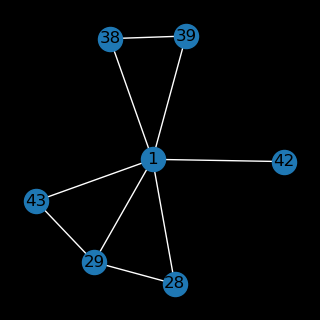

In [31]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = T.subgraph(get_nodes_and_nbrs(T, [29, 38, 42]))

# Draw the subgraph to the screen
fig=plt.figure(figsize=(3,3))
nx.draw(T_draw, with_labels=True, edge_color='white')
fig.set_facecolor('black')

## Extract all available attributes in nodes and edges

len(T)=48


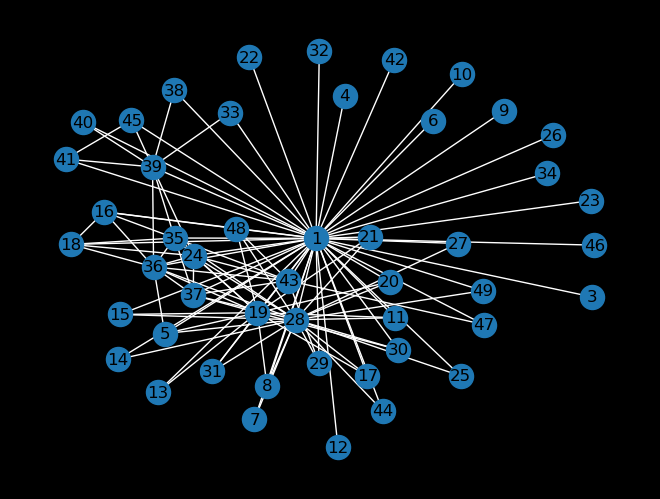

In [32]:
import datetime

T = nx.Graph()
nodes = {1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'celebrity'}, 22: {'category': 'D', 'occupation': 'scientist'}, 23: {'category': 'D', 'occupation': 'scientist'}, 24: {'category': 'P', 'occupation': 'politician'}, 25: {'category': 'I', 'occupation': 'celebrity'}, 26: {'category': 'P', 'occupation': 'celebrity'}, 27: {'category': 'D', 'occupation': 'scientist'}, 28: {'category': 'P', 'occupation': 'celebrity'}, 29: {'category': 'I', 'occupation': 'celebrity'}, 30: {'category': 'P', 'occupation': 'scientist'}, 31: {'category': 'D', 'occupation': 'scientist'}, 32: {'category': 'P', 'occupation': 'politician'}, 33: {'category': 'I', 'occupation': 'politician'}, 34: {'category': 'D', 'occupation': 'celebrity'}, 35: {'category': 'P', 'occupation': 'scientist'}, 36: {'category': 'D', 'occupation': 'scientist'}, 37: {'category': 'I', 'occupation': 'scientist'}, 38: {'category': 'P', 'occupation': 'celebrity'}, 39: {'category': 'D', 'occupation': 'celebrity'}, 40: {'category': 'I', 'occupation': 'celebrity'}, 41: {'category': 'I', 'occupation': 'celebrity'}, 42: {'category': 'P', 'occupation': 'scientist'}, 43: {'category': 'I', 'occupation': 'celebrity'}, 44: {'category': 'I', 'occupation': 'politician'}, 45: {'category': 'D', 'occupation': 'scientist'}, 46: {'category': 'I', 'occupation': 'politician'}, 47: {'category': 'I', 'occupation': 'celebrity'}, 48: {'category': 'P', 'occupation': 'celebrity'}, 49: {'category': 'P', 'occupation': 'politician'}}
T.add_nodes_from(list(nodes.items()))
edges = [(1, 3, {'date': datetime.date(2012, 11, 16)}), (1, 4, {'date': datetime.date(2013, 6, 7)}), (1, 5, {'date': datetime.date(2009, 7, 27)}), (1, 6, {'date': datetime.date(2014, 12, 18)}), (1, 7, {'date': datetime.date(2010, 10, 18)}), (1, 8, {'date': datetime.date(2012, 4, 18)}), (1, 9, {'date': datetime.date(2007, 10, 14)}), (1, 10, {'date': datetime.date(2012, 9, 8)}), (1, 11, {'date': datetime.date(2010, 1, 6)}), (1, 12, {'date': datetime.date(2012, 12, 27)}), (1, 13, {'date': datetime.date(2008, 12, 18)}), (1, 14, {'date': datetime.date(2014, 5, 25)}), (1, 15, {'date': datetime.date(2009, 11, 12)}), (1, 16, {'date': datetime.date(2008, 8, 6)}), (1, 17, {'date': datetime.date(2007, 8, 11)}), (1, 18, {'date': datetime.date(2009, 10, 7)}), (1, 19, {'date': datetime.date(2008, 7, 24)}), (1, 20, {'date': datetime.date(2013, 11, 18)}), (1, 21, {'date': datetime.date(2011, 3, 28)}), (1, 22, {'date': datetime.date(2013, 3, 4)}), (1, 23, {'date': datetime.date(2012, 4, 20)}), (1, 24, {'date': datetime.date(2009, 6, 6)}), (1, 25, {'date': datetime.date(2013, 6, 18)}), (1, 26, {'date': datetime.date(2014, 11, 20)}), (1, 27, {'date': datetime.date(2007, 4, 28)}), (1, 28, {'date': datetime.date(2014, 3, 28)}), (1, 29, {'date': datetime.date(2014, 1, 23)}), (1, 30, {'date': datetime.date(2007, 10, 9)}), (1, 31, {'date': datetime.date(2009, 2, 17)}), (1, 32, {'date': datetime.date(2009, 10, 14)}), (1, 33, {'date': datetime.date(2010, 5, 19)}), (1, 34, {'date': datetime.date(2009, 12, 21)}), (1, 35, {'date': datetime.date(2014, 11, 16)}), (1, 36, {'date': datetime.date(2010, 2, 25)}), (1, 37, {'date': datetime.date(2010, 9, 23)}), (1, 38, {'date': datetime.date(2007, 4, 28)}), (1, 39, {'date': datetime.date(2007, 4, 8)}), (1, 40, {'date': datetime.date(2010, 5, 15)}), (1, 41, {'date': datetime.date(2009, 8, 12)}), (1, 42, {'date': datetime.date(2013, 3, 9)}), (1, 43, {'date': datetime.date(2011, 11, 14)}), (1, 44, {'date': datetime.date(2013, 4, 6)}), (1, 45, {'date': datetime.date(2010, 1, 18)}), (1, 46, {'date': datetime.date(2011, 8, 20)}), (1, 47, {'date': datetime.date(2014, 8, 3)}), (1, 48, {'date': datetime.date(2010, 3, 15)}), (1, 49, {'date': datetime.date(2007, 9, 2)}), (5, 19, {'date': datetime.date(2013, 6, 12)}), (5, 28, {'date': datetime.date(2010, 12, 4)}), (5, 36, {'date': datetime.date(2013, 4, 7)}), (7, 28, {'date': datetime.date(2011, 11, 21)}), (8, 19, {'date': datetime.date(2010, 11, 5)}), (8, 28, {'date': datetime.date(2007, 6, 26)}), (11, 19, {'date': datetime.date(2012, 4, 16)}), (11, 28, {'date': datetime.date(2011, 6, 21)}), (13, 19, {'date': datetime.date(2012, 12, 13)}), (14, 28, {'date': datetime.date(2013, 12, 18)}), (15, 19, {'date': datetime.date(2008, 12, 13)}), (15, 28, {'date': datetime.date(2014, 6, 3)}), (16, 18, {'date': datetime.date(2008, 8, 5)}), (16, 35, {'date': datetime.date(2014, 6, 4)}), (16, 36, {'date': datetime.date(2008, 10, 10)}), (16, 48, {'date': datetime.date(2014, 1, 27)}), (17, 19, {'date': datetime.date(2007, 11, 11)}), (17, 28, {'date': datetime.date(2012, 10, 11)}), (18, 24, {'date': datetime.date(2009, 2, 4)}), (18, 35, {'date': datetime.date(2008, 12, 1)}), (18, 36, {'date': datetime.date(2013, 2, 6)}), (19, 20, {'date': datetime.date(2008, 11, 9)}), (19, 21, {'date': datetime.date(2007, 7, 23)}), (19, 24, {'date': datetime.date(2013, 12, 13)}), (19, 30, {'date': datetime.date(2012, 6, 6)}), (19, 31, {'date': datetime.date(2011, 1, 27)}), (19, 35, {'date': datetime.date(2014, 3, 3)}), (19, 36, {'date': datetime.date(2007, 10, 22)}), (19, 37, {'date': datetime.date(2008, 4, 20)}), (19, 48, {'date': datetime.date(2010, 12, 23)}), (20, 28, {'date': datetime.date(2012, 4, 15)}), (21, 28, {'date': datetime.date(2014, 4, 27)}), (24, 28, {'date': datetime.date(2013, 1, 27)}), (24, 36, {'date': datetime.date(2009, 4, 23)}), (24, 37, {'date': datetime.date(2008, 6, 27)}), (24, 39, {'date': datetime.date(2007, 1, 27)}), (24, 43, {'date': datetime.date(2014, 2, 12)}), (25, 28, {'date': datetime.date(2014, 5, 9)}), (27, 28, {'date': datetime.date(2007, 8, 9)}), (28, 29, {'date': datetime.date(2012, 4, 3)}), (28, 30, {'date': datetime.date(2007, 12, 2)}), (28, 31, {'date': datetime.date(2008, 6, 1)}), (28, 35, {'date': datetime.date(2012, 11, 16)}), (28, 36, {'date': datetime.date(2012, 9, 26)}), (28, 37, {'date': datetime.date(2014, 11, 12)}), (28, 44, {'date': datetime.date(2007, 11, 18)}), (28, 48, {'date': datetime.date(2008, 5, 25)}), (28, 49, {'date': datetime.date(2011, 12, 19)}), (29, 43, {'date': datetime.date(2014, 6, 4)}), (33, 39, {'date': datetime.date(2011, 9, 5)}), (35, 36, {'date': datetime.date(2008, 12, 1)}), (35, 37, {'date': datetime.date(2014, 5, 7)}), (35, 39, {'date': datetime.date(2007, 6, 17)}), (35, 43, {'date': datetime.date(2009, 6, 10)}), (36, 37, {'date': datetime.date(2014, 5, 13)}), (36, 39, {'date': datetime.date(2014, 12, 6)}), (36, 43, {'date': datetime.date(2013, 12, 17)}), (37, 43, {'date': datetime.date(2012, 1, 22)}), (38, 39, {'date': datetime.date(2009, 5, 15)}), (39, 40, {'date': datetime.date(2011, 6, 3)}), (39, 41, {'date': datetime.date(2009, 10, 5)}), (39, 45, {'date': datetime.date(2011, 1, 12)}), (41, 45, {'date': datetime.date(2009, 9, 7)}), (43, 47, {'date': datetime.date(2014, 12, 21)}), (43, 48, {'date': datetime.date(2013, 1, 28)})]
T.add_edges_from(edges)
print(f'{len(T)=}')
fig=plt.figure()
nx.draw(T, with_labels=True, edge_color='white')
fig.set_facecolor('black')

### Node attributes

In [33]:
set([k for n in T.nodes for k in T.nodes[n].keys()])

{'category', 'occupation'}

### Edge attributes

In [34]:
set([k for n in T.edges for k in T.edges[n].keys()])

{'date'}

## Extract nodes that have a particular metadata property

len(nodes)=20


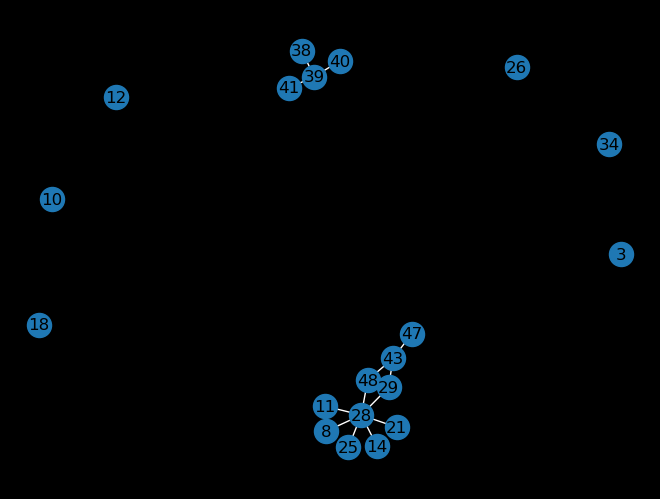

In [35]:
# Extract the nodes whose occupation is celebrity
nodes = [node for node, attributes in T.nodes(data=True) if attributes['occupation'] == 'celebrity']
print(f'{len(nodes)=}')
fig=plt.figure()
nx.draw(T.subgraph(nodes), with_labels=True, edge_color='white')
fig.set_facecolor('black')

## Unite select nodes and their neighbors

len(T_sub)=39


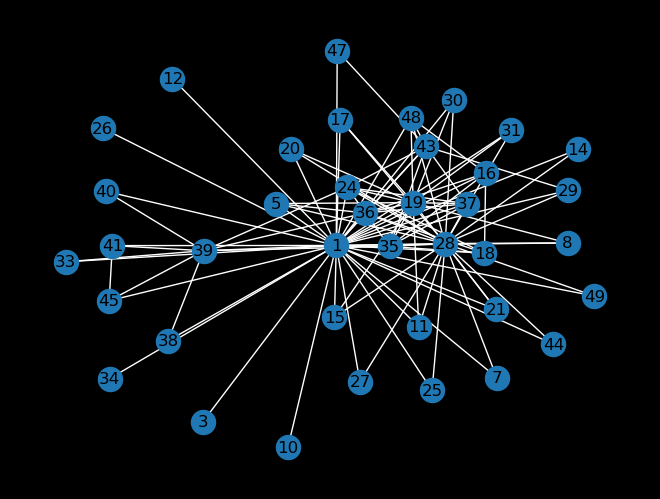

In [36]:
# Create the set of nodes: nodeset
nodeset = set(nodes)
# Iterate over nodes
for node in nodes:
    # Compute the neighbors of n: nbrs
    neighbors = T.neighbors(node)
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(neighbors)
# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)
print(f'{len(T_sub)=}')
# Draw T_sub to the screen
fig=plt.figure()
nx.draw(T_sub, with_labels=True, edge_color='white')
fig.set_facecolor('black')